### Part 1: Adversarial Set - AddSent (Error analysis)

#### Error Classification

In [15]:
import json, os

# Define the categories
categories = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}

# Function to classify errors
def classify_error(example):
    question = example["question"].lower()
    predicted_answer = example["predicted_answer"].lower()
    correct_answers = [answer.lower() for answer in example["answers"]["text"]]

    # Check for numerical errors
    if any(char.isdigit() for char in predicted_answer):
        return "Numerical Errors"

    # Check for entity errors
    if any(entity in question for entity in ["where", "who", "what", "which", "when"]):
        return "Entity Errors"
    
    # Default to contextual errors
    return "Contextual Errors"

# Read the JSONL file and classify each example
with open('addSent_incorrect_pred.jsonl', 'r') as file:
    for line in file:
        example = json.loads(line)
        category = classify_error(example)
        categories[category].append(example)

# Print the results
for category, examples in categories.items():
    print(f"{category}: {len(examples)} examples")

Entity Errors: 236 examples
Numerical Errors: 82 examples
Contextual Errors: 17 examples


In [5]:
import shutil
# Save the classified examples to separate files
if (os.path.exists('addSent_error_classes')):
    shutil.rmtree('addSent_error_classes')
os.mkdir('addSent_error_classes')
for category, examples in categories.items():
    with open(f'addSent_error_classes/{category.replace(" ", "_").lower()}.jsonl', 'w') as file:
        for example in examples:
            file.write(json.dumps(example) + '\n')

#### Generating a Bar Chart: Distrubution of Errors

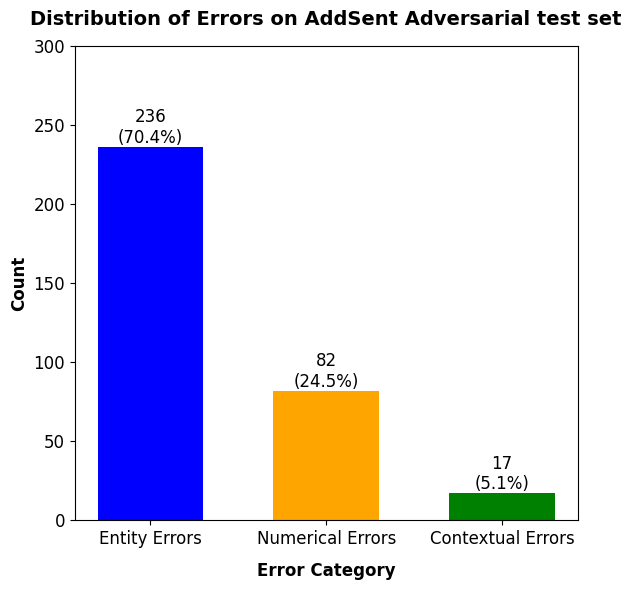

In [16]:
import matplotlib.pyplot as plt

# Data
category_names = categories.keys()
counts = [len(examples) for examples in categories.values()]
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Create bar chart
plt.figure(figsize=(6, 6))  # Adjust the figure size to fit one column
bars = plt.bar(category_names, counts, color=['blue', 'orange', 'green'], width=0.6)
plt.xlabel('Error Category', fontsize=12, fontweight='semibold', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='semibold')
plt.ylim(0, 300) 
plt.title('Distribution of Errors on AddSent Adversarial test set', fontsize=14, pad=15, fontweight='bold')

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=12)  # Increase the fontsize for x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()

### Part 1: Adversarial Set - AddOneSent (Error Analysis)

#### Error Classification

In [17]:
# Reset the categories
categories = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}

# Read the JSONL file and classify each example
with open('addOneSent_incorrect_pred.jsonl', 'r') as file:
    for line in file:
        example = json.loads(line)
        category = classify_error(example)
        categories[category].append(example)

# Print the results
for category, examples in categories.items():
    print(f"{category}: {len(examples)} examples")

Entity Errors: 66 examples
Numerical Errors: 33 examples
Contextual Errors: 3 examples


#### Generating a Bar Chart: Distrubution of Errors

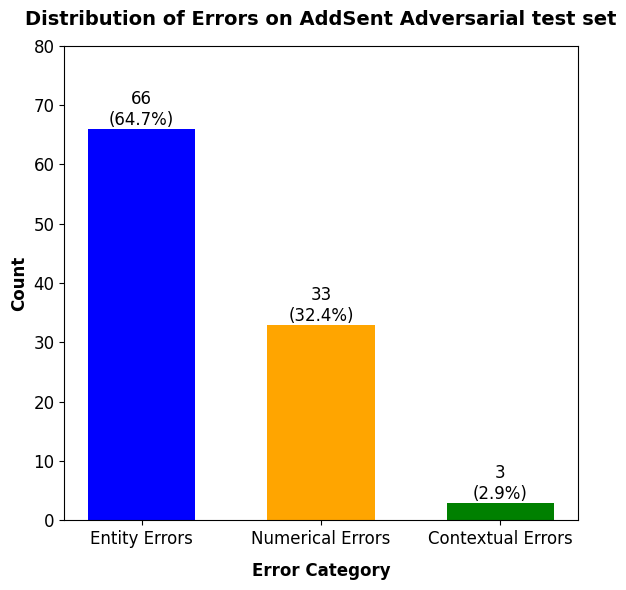

In [22]:
# Data
category_names = categories.keys()
counts = [len(examples) for examples in categories.values()]
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Create bar chart
plt.figure(figsize=(6, 6))  # Adjust the figure size to fit one column
bars = plt.bar(category_names, counts, color=['blue', 'orange', 'green'], width=0.6)
plt.xlabel('Error Category', fontsize=12, fontweight='semibold', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='semibold')
plt.ylim(0, 80) 
plt.title('Distribution of Errors on AddSent Adversarial test set', fontsize=14, pad=15, fontweight='bold')

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=12)  # Increase the fontsize for x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()

#### Misc Script - Checking how many perturbed/unperturbed contexts are there in adv set (addOne)

In [18]:
import json

# Function to check if context is perturbed
def is_perturbed(context, original_contexts):
    for original in original_contexts:
        if context == original:
            return False
    return True

# Check each context in the adversarial dataset
def check_adv_data(adversarial_data, original_contexts):
    perturbed_count = 0
    unperturbed_count = 0

    for example in adversarial_data:
        context = example['context']
        if is_perturbed(context, original_contexts):
            perturbed_count += 1
        else:
            unperturbed_count += 1

    return perturbed_count, unperturbed_count


# Load the original SQuAD dataset
with open('../eval_output/eval_predictions.jsonl', 'r') as file:
    original_data = [json.loads(line) for line in file]
    original_contexts = [example['context'] for example in original_data]

adversarial_data_addSent = []
adversarial_data_addOneSent = []

# Load the squad_adversarial dataset addSent
with open('../adv_addSent/eval_output/eval_predictions.jsonl', 'r') as file:
    adversarial_data_addSent = [json.loads(line) for line in file]

# Load the squad_adversarial dataset addOneSent
with open('../adv_addOneSent/eval_output/eval_predictions.jsonl', 'r') as file:
    adversarial_data_addOneSent += [json.loads(line) for line in file]

# Check each context in the adversarial dataset addSent
perturbed_count, unperturbed_count = check_adv_data(adversarial_data_addSent, original_contexts)

# Print the results
print("AddSent Adversarial Dataset:")
print(f"Perturbed contexts: {perturbed_count}")
print(f"Unperturbed contexts: {unperturbed_count}")

# Check each context in the adversarial dataset addOneSent
perturbed_count, unperturbed_count = check_adv_data(adversarial_data_addOneSent, original_contexts)

# Print the results
print("AddOneSent Adversarial Dataset:")
print(f"Perturbed contexts: {perturbed_count}")
print(f"Unperturbed contexts: {unperturbed_count}")

AddSent Adversarial Dataset:
Perturbed contexts: 512
Unperturbed contexts: 0
AddOneSent Adversarial Dataset:
Perturbed contexts: 158
Unperturbed contexts: 0
